## Kmeans 


In [15]:
#For visualisation

import pandas as pd
import numpy as np
df = pd.read_table('C:/Users/rajku/Desktop/Anaconda/clustering.csv', sep=',')
df = np.array(df)
from sklearn.metrics.pairwise import euclidean_distances

In [16]:
#Distance Function
def distance_cal (data, centres):
    """ 
    Calculate distance from data to each center
    Input: 
    data n * d
    centers k*d  
    """
    #print(np.shape(centres))
    n = np.shape(data)[0]
    #print(np.shape(centres))
    k = np.shape(centres)[0]
    
    #print('k')
    dist = np.zeros(shape=(n,k))
    for l1 in range(0,n):
        for l2 in range(0,k):
            dist[l1][l2] = np.linalg.norm((np.array(data[l1])- np.array(centres[l2]))**2)
    return dist

In [50]:
def k_means(data, centres, k, tol):
    """
    Kmeans algorihtm 
    input data
    output: new clusters, centres
    
    """
    n = data.shape[0]
    epochs = 100
    c = 0 
    for epoch in range(0,epochs):
        #calculated distances
        print (centres.shape)

        dist = distance_cal (data, centres)
        #assign cluster labels
        cluster_labels = np.argmin(dist, axis = 1) # n*1
        #new centroids
        centres_updates = np.zeros(shape = centres.shape)
        
        for j in range(0, k):
            points = []
            if sum(cluster_labels == j) == 0:
                centres_updates[j] = centres[j]
            else:
               # print (data[0])
                for d,label in zip(data, cluster_labels):
                    if label == j:
                        points.append(list(d))
                
                centres_updates[j] = np.mean(points,axis = 0)                 
                np.mean(data[cluster_labels == j, :], axis=0)
               
        if (np.mean(np.amin(euclidean_distances(centres, centres_updates), axis = 1)) <= tol):
            print ("Convergence, iterations:", c)
            break 
        c+=1
        centres = centres_updates
        
    return({"Iterations":c,     "Centroids": centres, 
            "Labels": cluster_labels, "Cost": (np.mean(np.amin(euclidean_distances(data, centres), axis = 1)))})

### Random Intialization

In [51]:
k = 2

Rcentroids_initial = df[np.random.choice(range(df.shape[0]), 2, replace=False),:]

Routput_k = k_means(df, Rcentroids_initial,k, 0.000000001)
Routput_k


(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
Convergence, iterations: 4


{'Centroids': array([[-0.22252391, -0.05745518],
        [ 4.8043181 ,  1.04778105]]),
 'Cost': 1.5249562292132441,
 'Iterations': 4,
 'Labels': array([0, 0, 0, ..., 1, 1, 1], dtype=int64)}

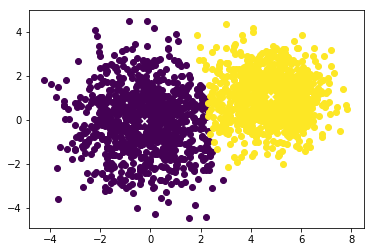

In [49]:
import matplotlib.pyplot as plt

cmap = plt.get_cmap('viridis')
colors = [cmap(i) for i in np.linspace(0, 1, k)]
centroids = Routput_k["Centroids"]
labels = Routput_k["Labels"]

for i,color in enumerate(colors,start =0):
    plt.scatter(df[labels==i, :][:,0], df[labels==i, :][:,1], color=color)

for j in range(k):
    plt.scatter(centroids[j,0],centroids[j,1],color = ['w', 'red'],marker='x')
plt.show()

In [58]:
k = [2,3,4,6,8,9]
for i in k:
    Rcentroids_initial = df[np.random.choice(range(df.shape[0]), i, replace=False),:]

    Routput_k = k_means(df, Rcentroids_initial,i, 0.001)
    print(Routput_k)
    cmap = plt.get_cmap('viridis')
    colors = [cmap(i) for i in np.linspace(0, 1, k)]
    centroids = Routput_k["Centroids"]
    labels = Routput_k["Labels"]


(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
Convergence, iterations: 4
{'Iterations': 4, 'Centroids': array([[ 4.8043181 ,  1.04778105],
       [-0.22252391, -0.05745518]]), 'Labels': array([1, 1, 1, ..., 0, 0, 0], dtype=int64), 'Cost': 1.5249562292132441}


TypeError: int() argument must be a string, a bytes-like object or a number, not 'list'